In [1]:
from PIL import Image, ImageFilter
import os
import numpy as np
from math import sqrt

In [9]:
#Nessa técnica é mais interessante trabalhar com imagens em escala de cinza. Apenas um canal
img = ( '/content/drive/My Drive/Imagens/Anime/14 - 1.jpg')

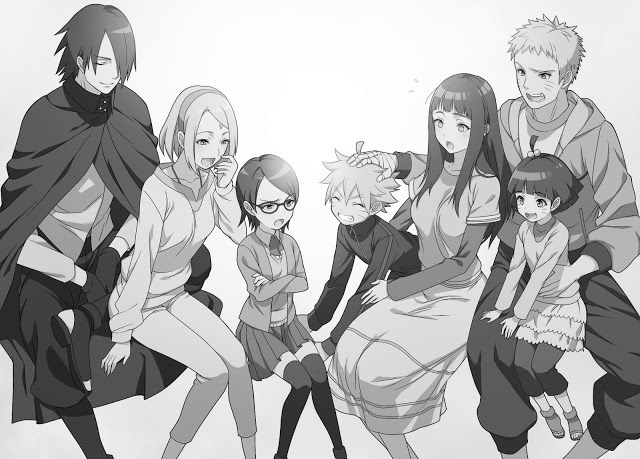

In [10]:
img

In [3]:
## insted img.show() use img para exibir a imagem carregada.

In [19]:
## Criando o núcleo Sobel (Kernel) para detecção das arestas 
## Para esse kernel, o filtro pecorrer a imagem no eixo horizontal.

def show_edges(filename, direction='x', offset=0):
  #Aplica um filtro sobel a image
  
  original = Image.open(filename).convert('L')

  XSOBEL = ImageFilter.Kernel((3,3),
                              [-1, 0, 1,
                              -2, 0, 2,
                              -1, 0, 1],
                              1,
                              offset)
  YSOBEL = ImageFilter.Kernel((3,3),
                              [-1, -2, 11,
                              0, 0, 0,
                              1, 2, 1],
                              1,
                              offset)
  if direction == 'x':
    filtered = original.filter(XSOBEL)
  elif direction == 'y':
    filtered = original.filter(YSOBEL)
  else:
    vsobel = original.filter(XSOBEL)
    hsobel = original.filter(YSOBEL)

    w,h = original.size
    filtered = Image.new('L', (w,h))

    for i in range(w):
      for j in range(h):
        value = sqrt(
            vsobel.getpixel((i,j))**2 + hsobel.getpixel((i,j))**2
        )
        value = int(min(value, 255))
        filtered.putpixel((i,j), value)
    
  return filtered

In [32]:
test = show_edges(img, 'x', 100)

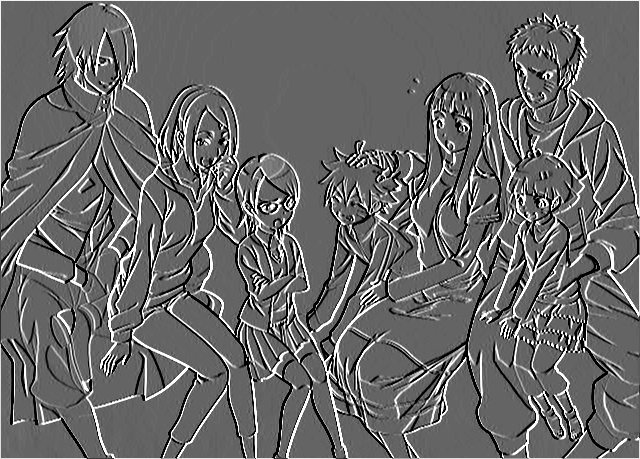

In [33]:
test